## Linear Regression

Linear regression is a fundamental statistical modeling technique used to predict healthcare insurance charges based on various features such as age, BMI, and smoking status. In this notebook, we'll explore how linear regression can help us understand the relationship between these features and insurance costs.

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install tqdm


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# import data

import pandas as pd
data = pd.read_csv("Medical_insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders for categorical columns
categorical_columns = ['sex', 'smoker', 'region']
label_encoders = {}

# Convert categorical columns to numerical
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

print("Encoded categories:")
for column in categorical_columns:
    print(f"\n{column}:")
    for i, label in enumerate(label_encoders[column].classes_):
        print(f"{label}: {i}")

Encoded categories:

sex:
female: 0
male: 1

smoker:
no: 0
yes: 1

region:
northeast: 0
northwest: 1
southeast: 2
southwest: 3


In [4]:
data.shape

(2772, 7)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler
scaler = MinMaxScaler()

# Scale all columns since they are all numeric now
columns_to_scale = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data


,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
2767,0.630435,0.0,0.789884,0.2,0.0,0.666667,0.118885
2768,0.065217,0.0,0.501480,0.0,0.0,1.000000,0.014339
2769,0.021739,1.0,0.270917,0.2,1.0,0.333333,0.244683
2770,0.108696,1.0,0.074119,0.0,0.0,0.333333,0.326799


In [6]:

from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('charges', axis=1)
                                                    , data['charges'], test_size=0.2, random_state=0)


In [7]:
X_test.shape, y_test.shape

((555, 6), (555,))

In [8]:
X_train.shape, y_train.shape

((2217, 6), (2217,))

## The formulation

##### The formulation can be expressed as:

<div align="center">

$\hat{y} =  x \cdot w + \beta$

</div>

Where:
- $y_j$ is the predicted insurance charge for the $j$-th individual
- $x_{ji}$ represents the $i$-th feature value for the $j$-th individual
- $w_i$ is the weight coefficient for the $i$-th feature
- $\epsilon_j$ is the error term for the $j$-th prediction
- $p$ is the number of features in our model

##### But how can we train it?

The idea is to start with random $w$ and $\epsilon$ values and iteratively update them to minimize a Loss function.

Note that $w$ and $x_i$ are vectors of size $m$ where $m$ is the number of features.

We need to define a Loss here. Although there are multiple choices, teh most used one is MSE and let's use it here as well.


### Loss function - Mean Squared Error

If there are n datapoints we have:
<div align="center">

$L= \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$

$L= \frac{1}{n} \sum\limits_{i=1}^n (y_i - x_i \cdot w + \beta)^2$

</div>

### Gradient Descent

To apply gradient descent on it, we must check the derivatives w.r.t $w$ and $\beta$


Let's derive the gradient with respect to $w$ and $\beta$:

For the weight vector $w$:
<div align="center">

$\frac{\partial L}{\partial w} = -\frac{2}{n} \sum\limits_{i=1}^n x_i(y_i - x_i \cdot w - \beta)$

</div>

For the bias term $\beta$:
<div align="center">

$\frac{\partial L}{\partial \beta} = -\frac{2}{n} \sum\limits_{i=1}^n (y_i - x_i \cdot w - \beta)$

</div>

The gradient descent update rules become:
<div align="center">

$w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w}$

$\beta_{t+1} = \beta_t - \alpha \frac{\partial L}{\partial \beta}$

</div>

where $\alpha$ is the learning rate and $t$ is the iteration number.





In [9]:
alpha = 0.001

import numpy as np

w = np.random.normal(size=(6,))
b = np.random.normal(size=(1,))
w, b

(array([-0.76679759,  0.46269613, -1.69057314, -0.62163471, -1.42761203,
        -1.37105285]),
 array([-1.07918898]))

In [10]:
# training loop
import tqdm

mse_loss_training =  []
mse_loss_validation = []

for epoch in tqdm.tqdm(range(10000)):
    
    training_error = 0
    w_grad = np.zeros((6,))
    b_grad = 0
    
    y_hat = np.dot(X_train, w) + b
    training_error = np.mean((y_train - y_hat)**2)

    w_grad = 2 * np.dot((y_hat - y_train), X_train) / len(X_train)
    b_grad = 2 * np.mean(y_hat - y_train)

    w = w - alpha * w_grad
    b = b - alpha * b_grad

    mse_loss_training.append(training_error)

    y_hat = np.dot(X_test, w) + b
    validation_error = np.mean((y_test - y_hat)**2)
    mse_loss_validation.append(validation_error)



100%|██████████| 10000/10000 [00:02<00:00, 3610.09it/s]


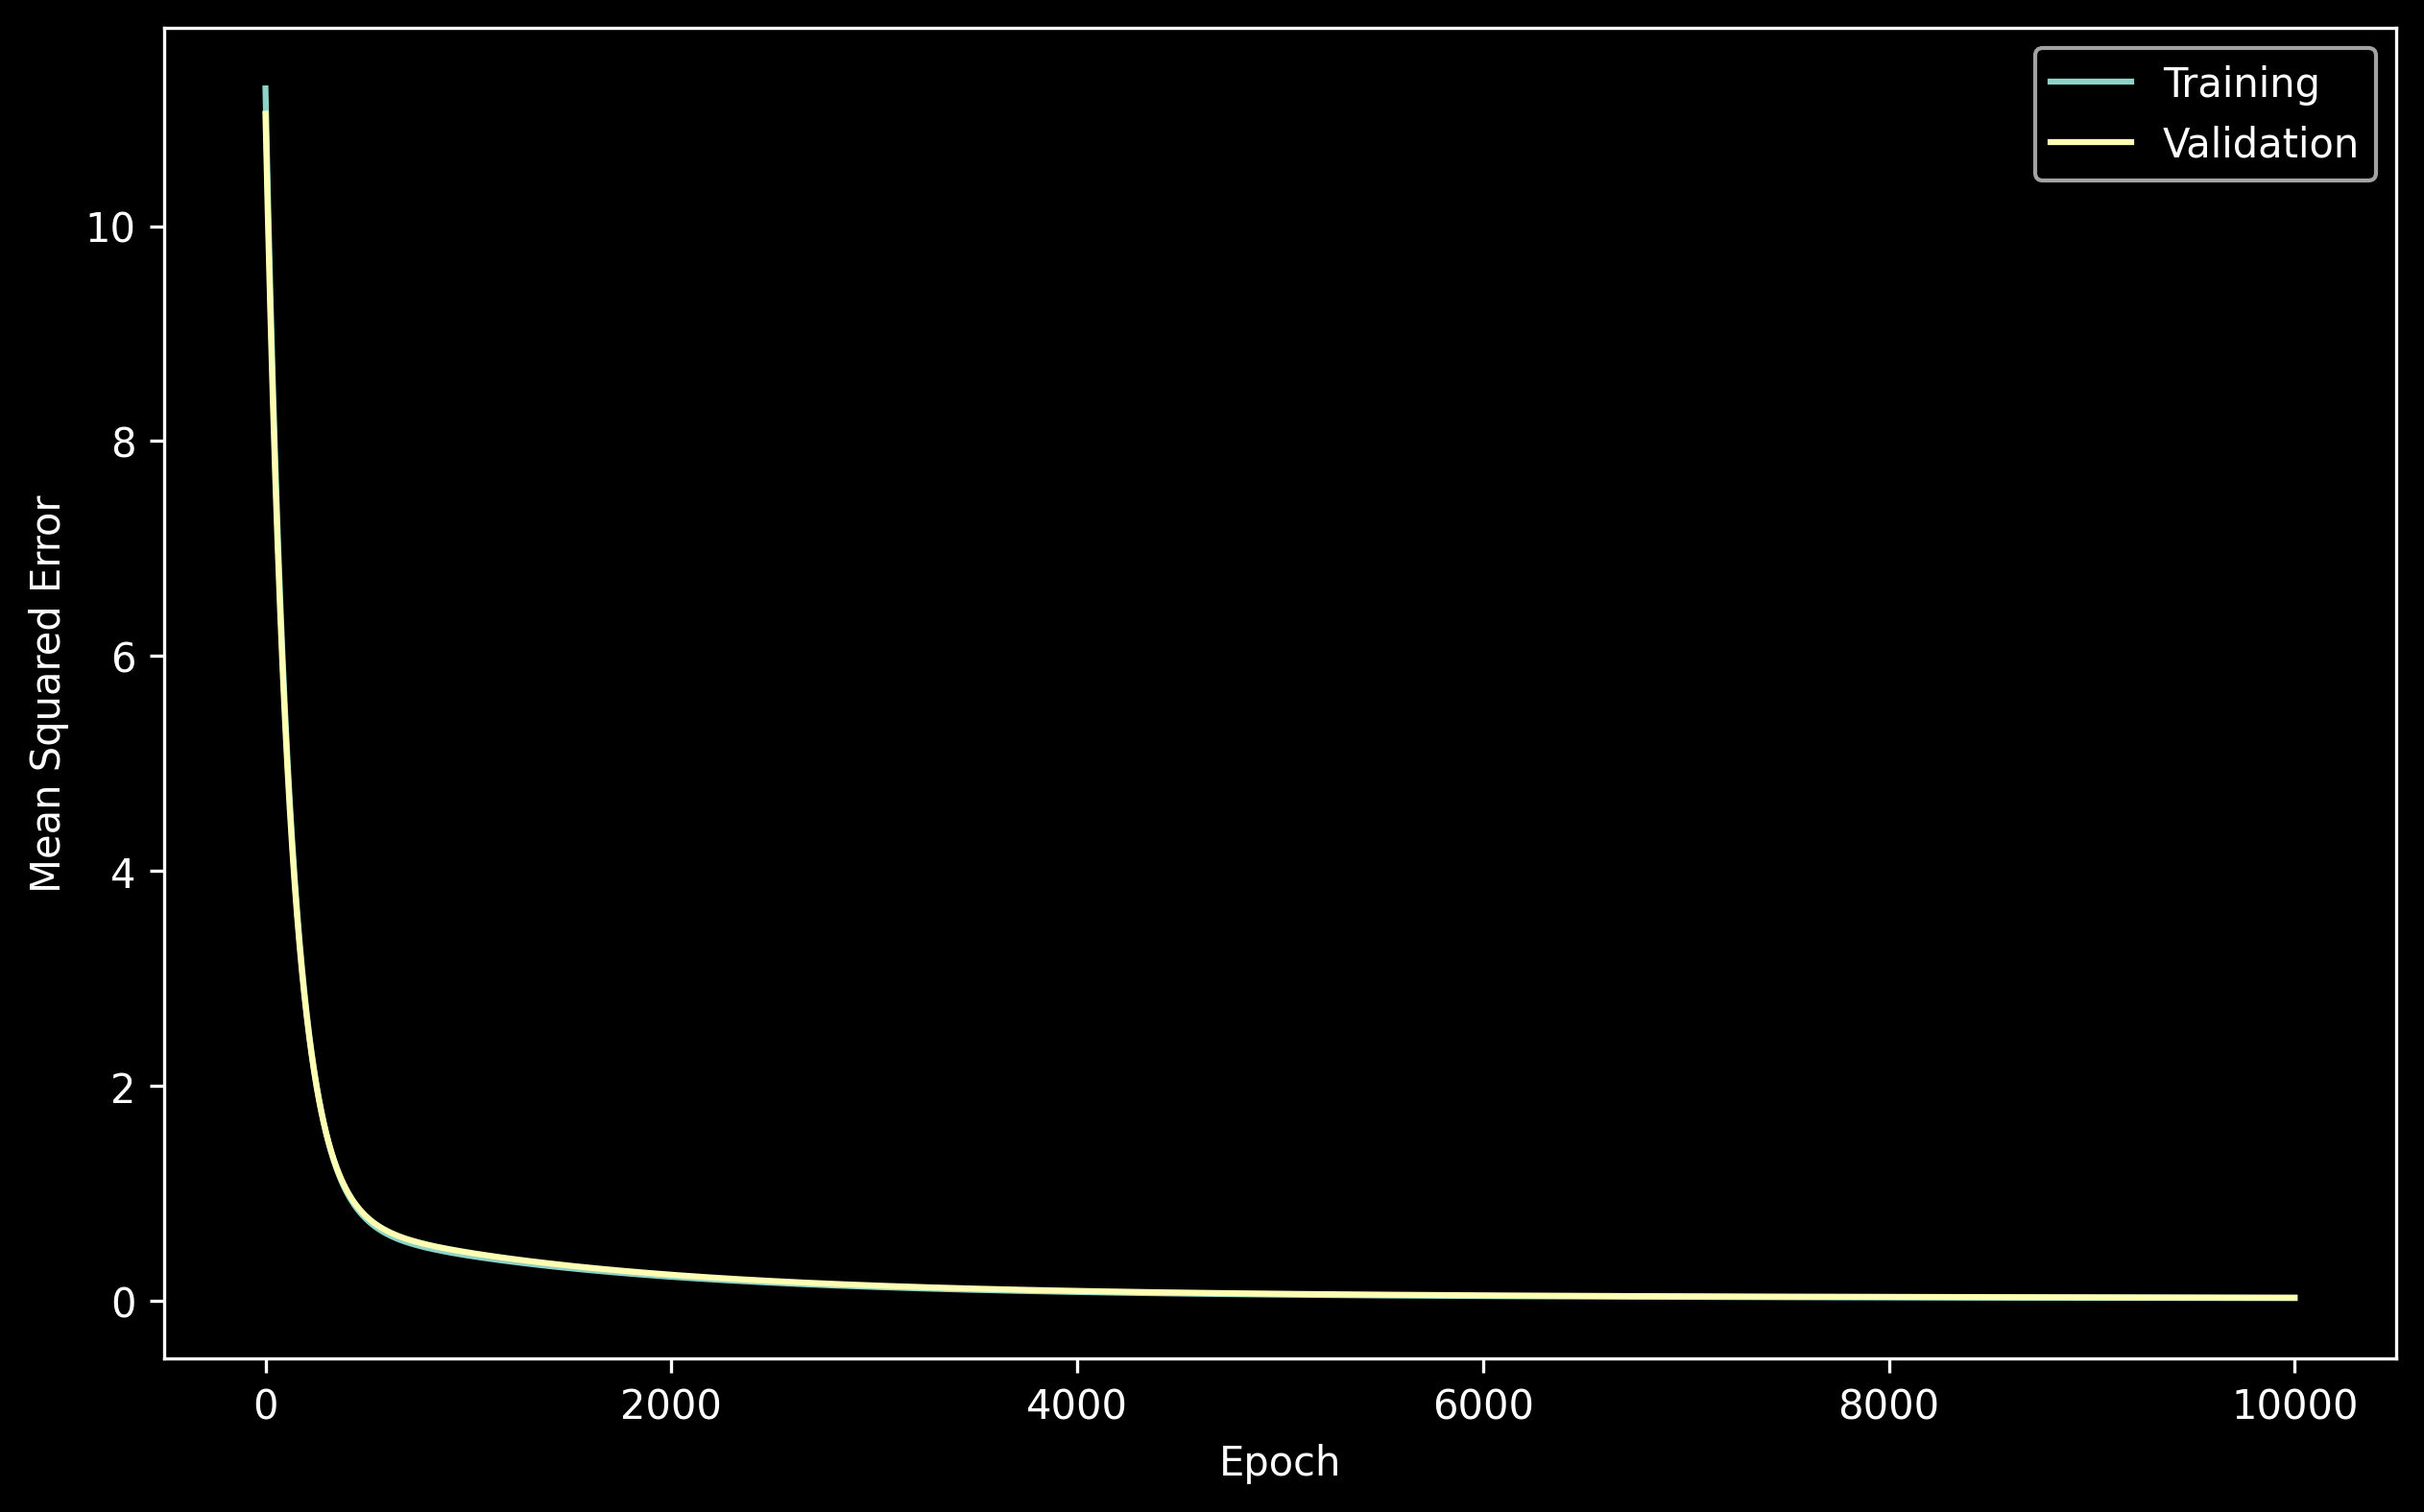

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6), dpi=300)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(mse_loss_training, label='Training')
plt.plot(mse_loss_validation, label='Validation')
plt.style.use('dark_background')
plt.background_color = 'black'
plt.legend()



In [12]:
# sample predictions

samples = X_test[:10]
predictions = np.dot(samples, w) + b

print("Sample predictions:")
for i in range(10):
    print(f"Predicted: {predictions[i]}, Actual: {y_test.iloc[i]}")


Sample predictions:
Predicted: 0.16972325452814385, Actual: 0.017553326898321286
Predicted: 0.30810849823491915, Actual: 0.3267993759928133
Predicted: 0.06660551196420855, Actual: 0.06712886529856418
Predicted: 0.010586945878265308, Actual: 0.0022566378747028992
Predicted: 0.09361618765842505, Actual: 0.15310441296312305
Predicted: 0.11966976957218481, Actual: 0.02759536711676553
Predicted: 0.1581208815715136, Actual: 0.06196438457596192
Predicted: 0.24658487391517764, Actual: 0.04602737670428895
Predicted: 0.10697182852578463, Actual: 0.07227367278181546
Predicted: 0.42297419114304063, Actual: 0.5164355939195673


##### we will handle overfitting by using regularization in a later notebook